In [11]:
from sklearn.decomposition import PCA
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
path = Path().resolve().parent / 'dataset' / 'train' / 'processed'

df_train = pd.read_csv(Path().resolve().parent / 'dataset' / 'df_train.csv')[['PO', 'idx']]
df_train['label'] = df_train['PO'].map({0.1: 0, 0.575: 1, 1.050: 2, 1.525: 3, 2.000: 4})
df_train.sort_values(by=['idx'], inplace=True)

In [3]:
X = np.array([np.load(path / f'Bi2Te3-{i:08d}.npy')[:, 1] for i in df_train['idx']])
y = df_train['label'].values

In [4]:
X_pca = PCA(n_components=2).fit_transform(X)

In [5]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y

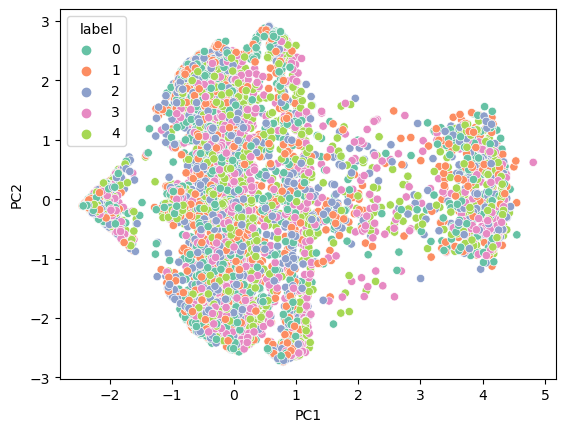

In [10]:
sns.scatterplot(x='PC1', y='PC2', hue='label', data=df_pca, palette='Set2')
plt.show()

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne['label'] = y

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 3.809s...
[t-SNE] Computed neighbors for 7000 samples in 115.605s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 0.218511
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.916588
[t-SNE] KL divergence after 300 iterations: 1.727189


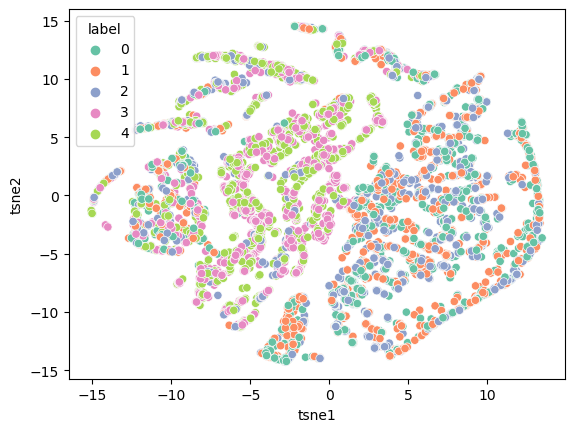

In [13]:
sns.scatterplot(x='tsne1', y='tsne2', hue='label', data=df_tsne, palette='Set2')
plt.show()